#Question No.2. NLP Dataset: Sentiment Analysis dataset - 1.6 Million tweets.


##### Dataset is downloaded to Drive from the link - https://www.kaggle.com/kazanova/sentiment140
#####The column 'text' has the tweet and 'target' gives the sentiment of the text.


###DL Group 196:
###S Alagu Thiruvadi Nainar -- 2019AH04028
###Ashutosh More -- 2019AH04080
###Avinash Menon -- 2019AH04057

In [ ]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file = 'drive/MyDrive/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file,encoding='ISO-8859-1',names=["target","id","date","flag","user","tweet"])
data.head()


,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print("No of unique classes")
classes = np.unique(data['target'])
print(classes)
print()

print("Sample with target 4(Positive)")
print(data.loc[data['target']==4,])
print()

print("Sample with target 0(Negative)")
print(data.loc[data['target']==0,])
print()

No of unique classes
[0 4]

Sample with target 4(Positive)
         target  ...                                              tweet
800000        4  ...       I LOVE @Health4UandPets u guys r the best!! 
800001        4  ...  im meeting up with one of my besties tonight! ...
800002        4  ...  @DaRealSunisaKim Thanks for the Twitter add, S...
800003        4  ...  Being sick can be really cheap when it hurts t...
800004        4  ...    @LovesBrooklyn2 he has that effect on everyone 
...         ...  ...                                                ...
1599995       4  ...  Just woke up. Having no school is the best fee...
1599996       4  ...  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  ...  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  ...  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[800000 rows x 6 columns]

Sample with target 0(Negative)
        target  ..

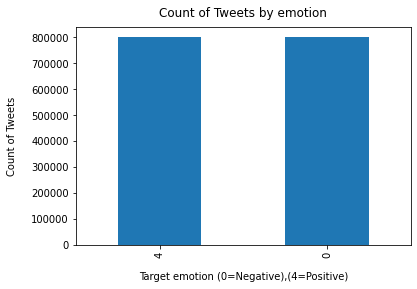

In [ ]:
data['target'].value_counts().plot(kind='bar')
plt.xlabel("Target emotion (0=Negative),(4=Positive)", labelpad=14)
plt.ylabel("Count of Tweets", labelpad=14)
plt.title("Count of Tweets by emotion", y=1.02);

In [ ]:
y = data.target
X = data.tweet
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,shuffle=True,random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,test_size=0.5,shuffle=True,random_state=1) # split test data to validation and test

print("\nTraining Data and Shape:\n")
print(X_train.head())
print(X_train.shape)
print(y_train.shape)

print("\nTest Data and Shape:\n")
print(X_test.head())
print(X_test.shape)
print(y_test.shape)



Training Data and Shape:

1551782    break from computer...gonna watch tv while wri...
527366     has to stop doing facebook quizzes and read hi...
144215                              my stomach hurts so bad 
971368      had a gooood weekend  summer school in the am =/
253655     RIP costco grill  thx for returning it though!...
Name: tweet, dtype: object
(1120000,)
(1120000,)

Test Data and Shape:

437781                                    Pounding headache 
212491     @xXMCR_LadyXx   i dont even know what mikey ha...
58442              MAD I'm awake!!! Can't fall back 2 sleep 
927867     I am trying to stop procrastinating so much bu...
1087915    @TwiExaminer That is lucky  heh not every day ...
Name: tweet, dtype: object
(240000,)
(240000,)


In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2" # https://tfhub.dev/google/nnlm-en-dim50/2
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 124,647,489
Trainable params: 124,647,489
Non-trainable params: 0
________________________________________

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
train_data = (X_train,y_train)
validation_data = (X_val,y_val)

y_train_norm = y_train/4
y_val_norm = y_val/4

history = model.fit(X_train,y_train_norm,
                    epochs=10,
                    verbose=1,
                    batch_size=512,
                    validation_data = (X_val,y_val_norm),
                    shuffle=True)

Epoch 1/10
2188/2188 [==============================] - 59s 27ms/step - loss: 0.5264 - accuracy: 0.7639 - val_loss: 0.4440 - val_accuracy: 0.7993
Epoch 2/10
2188/2188 [==============================] - 55s 25ms/step - loss: 0.4417 - accuracy: 0.8036 - val_loss: 0.4413 - val_accuracy: 0.8003
Epoch 3/10
2188/2188 [==============================] - 56s 25ms/step - loss: 0.4360 - accuracy: 0.8061 - val_loss: 0.4396 - val_accuracy: 0.8009
Epoch 4/10
2188/2188 [==============================] - 55s 25ms/step - loss: 0.4318 - accuracy: 0.8090 - val_loss: 0.4381 - val_accuracy: 0.8024
Epoch 5/10
2188/2188 [==============================] - 55s 25ms/step - loss: 0.4292 - accuracy: 0.8108 - val_loss: 0.4379 - val_accuracy: 0.8028
Epoch 6/10
2188/2188 [==============================] - 56s 26ms/step - loss: 0.4270 - accuracy: 0.8121 - val_loss: 0.4377 - val_accuracy: 0.8021
Epoch 7/10
2188/2188 [==============================] - 55s 25ms/step - loss: 0.4236 - accuracy: 0.8151 - val_loss: 0.4379 -

In [ ]:
#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.41854894161224365
Final training accuracy  0.8186383843421936


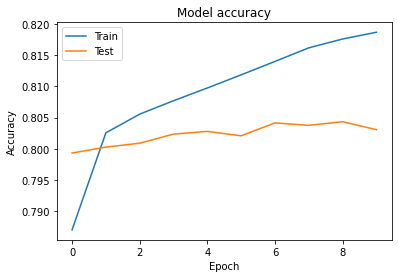

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

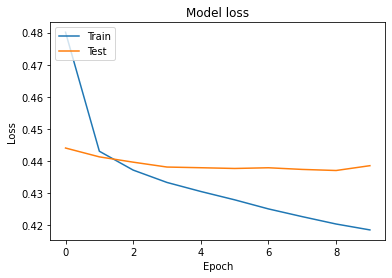

In [ ]:
# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the Model
y_test_norm= y_test/4

results = model.evaluate(X_test,y_test_norm, verbose=1)

for name, value in zip(model.metrics_names, results):
  print("Model Evaluation %s: %.3f" % (name, value))

Y_prediction = (model.predict(X_test) > 0.5).astype("int32")

Y_true = y_test/4

# Classification Report
print()
print('Classification Report:-')
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_prediction))

7500/7500 [==============================] - 25s 3ms/step - loss: 0.4392 - accuracy: 0.8024
Model Evaluation loss: 0.439
Model Evaluation accuracy: 0.802

Classification Report:-
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80    119564
         1.0       0.80      0.81      0.80    120436

    accuracy                           0.80    240000
   macro avg       0.80      0.80      0.80    240000
weighted avg       0.80      0.80      0.80    240000



**Hyperparameter Tuning - 1**

*Compile,Build and Evaluate model with changing the position and value of dropout layer*

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 124,647,489
Trainable params: 124,647,489
Non-trainable params: 0
__________________________________________

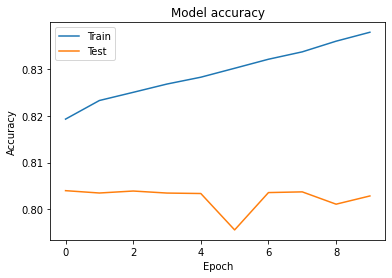

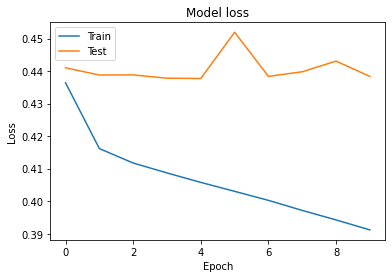

7500/7500 [==============================] - 26s 3ms/step - loss: 0.5404 - accuracy: 0.7872
Model Evaluation loss: 0.540
Model Evaluation accuracy: 0.787

Classification Report:-
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77    119564
         1.0       0.75      0.86      0.80    120436

    accuracy                           0.79    240000
   macro avg       0.79      0.79      0.79    240000
weighted avg       0.79      0.79      0.79    240000



In [ ]:
tf.keras.backend.clear_session()
model_dropout = tf.keras.Sequential()
model_dropout.add(hub_layer)
model_dropout.add(tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_dropout.add(tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_dropout.add(tf.keras.layers.Dropout(0.3))
model_dropout.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_dropout.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_dropout.summary()

model_dropout.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_dropout.fit(X_train,y_train_norm,
                    epochs=10,
                    verbose=1,
                    batch_size=512,
                    validation_data = (X_val,y_val_norm),
                    shuffle=True)

#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Plot training & validation accuracy values
print('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

results = model.evaluate(X_test,y_test_norm, verbose=1)

for name, value in zip(model.metrics_names, results):
  print("Model Evaluation %s: %.3f" % (name, value))

Y_prediction = (model.predict(X_test) > 0.5).astype("int32")

Y_true = y_test/4

# Classification Report
print()
print('Classification Report:-')
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_prediction))


**Hyperparameter Tuning - 2**

*Compile,Build and Evaluate model with changing the value of Batch Size*


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 124,647,489
Trainable params: 124,647,489
Non-trainable params: 0
__________________________________________

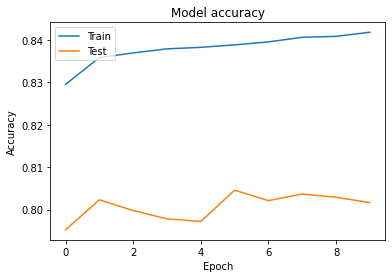

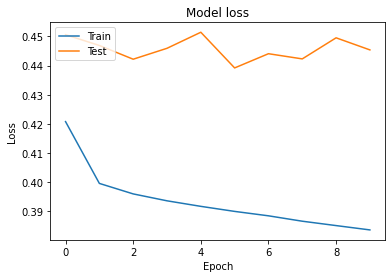

7500/7500 [==============================] - 25s 3ms/step - loss: 0.6220 - accuracy: 0.7796
Model Evaluation loss: 0.622
Model Evaluation accuracy: 0.780

Classification Report:-
              precision    recall  f1-score   support

         0.0       0.84      0.69      0.76    119564
         1.0       0.74      0.87      0.80    120436

    accuracy                           0.78    240000
   macro avg       0.79      0.78      0.78    240000
weighted avg       0.79      0.78      0.78    240000



In [ ]:
tf.keras.backend.clear_session()
model_batch = tf.keras.Sequential()
model_batch.add(hub_layer)
model_batch.add(tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_batch.add(tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_batch.add(tf.keras.layers.Dropout(0.3))
model_batch.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model_batch.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_batch.summary()

model_batch.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_batch.fit(X_train,y_train_norm,
                    epochs=10,
                    verbose=1,
                    batch_size=256,
                    validation_data = (X_val,y_val_norm),
                    shuffle=True)

#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Plot training & validation accuracy values
print('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

results = model.evaluate(X_test,y_test_norm, verbose=1)

for name, value in zip(model.metrics_names, results):
  print("Model Evaluation %s: %.3f" % (name, value))

Y_prediction = (model.predict(X_test) > 0.5).astype("int32")

Y_true = y_test/4

# Classification Report
print()
print('Classification Report:-')
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_prediction))

**Train Valid and Test Accuracy of each model in percentage:**                      
Model:-  **82,**         **80,**     **80**

Model(Change dropout layer):-  **83,**         **80,**     **78**

Model(change batch size):-          **84,**         **80,**     **78**






